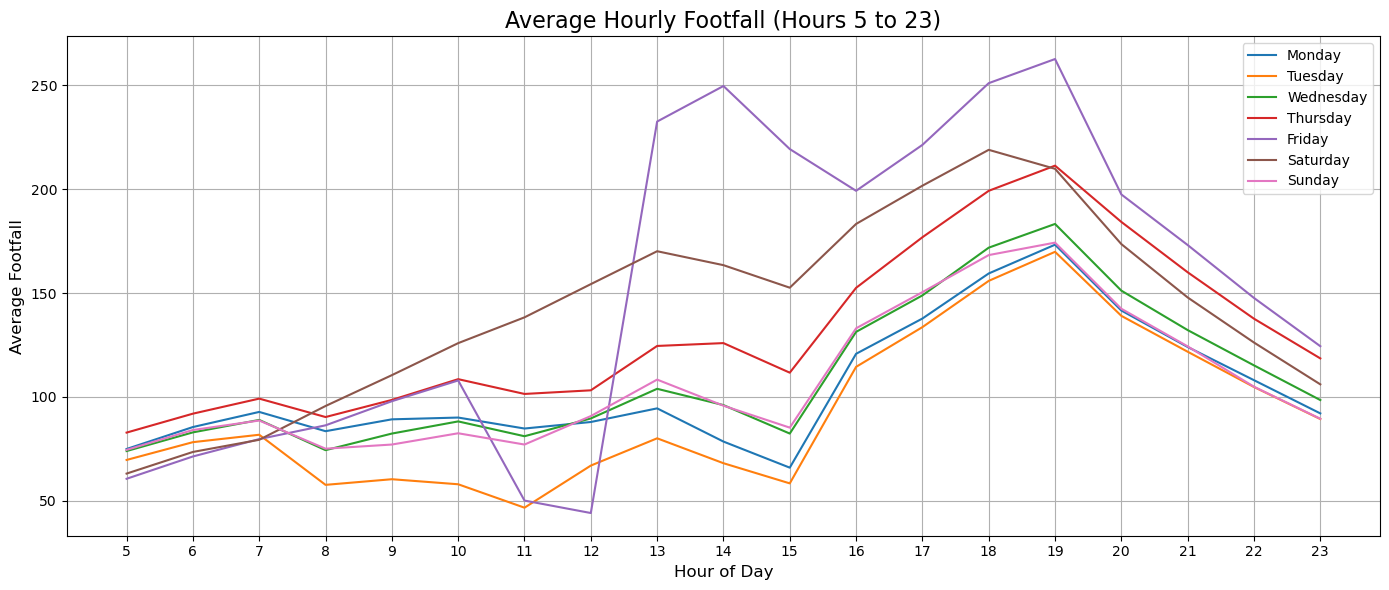

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:/Users/zaidb/Downloads/footfall_data (2).csv")

# Convert datetime
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed', dayfirst=True, errors='coerce')
df = df.dropna(subset=['datetime'])

# Extract hour and day name
df['hour'] = df['datetime'].dt.hour
df['day_name'] = df['datetime'].dt.day_name()

# Filter hours to only include 5 AM to 11 PM
df = df[(df['hour'] >= 5) & (df['hour'] <= 23)]

# Group by day and hour
avg_by_day_hour = df.groupby(['day_name', 'hour'])['footfall'].mean().reset_index()

# Sort days manually
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_by_day_hour['day_name'] = pd.Categorical(avg_by_day_hour['day_name'], categories=ordered_days, ordered=True)

# Pivot for plotting
pivot_df = avg_by_day_hour.pivot(index='hour', columns='day_name', values='footfall')

# Plot
plt.figure(figsize=(14, 6))
for day in ordered_days:
    if day in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[day], label=day)

plt.title("Average Hourly Footfall (Hours 5 to 23)", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average Footfall", fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(pivot_df.index)  # Only show actual hours (5–23)
plt.tight_layout()
plt.show()


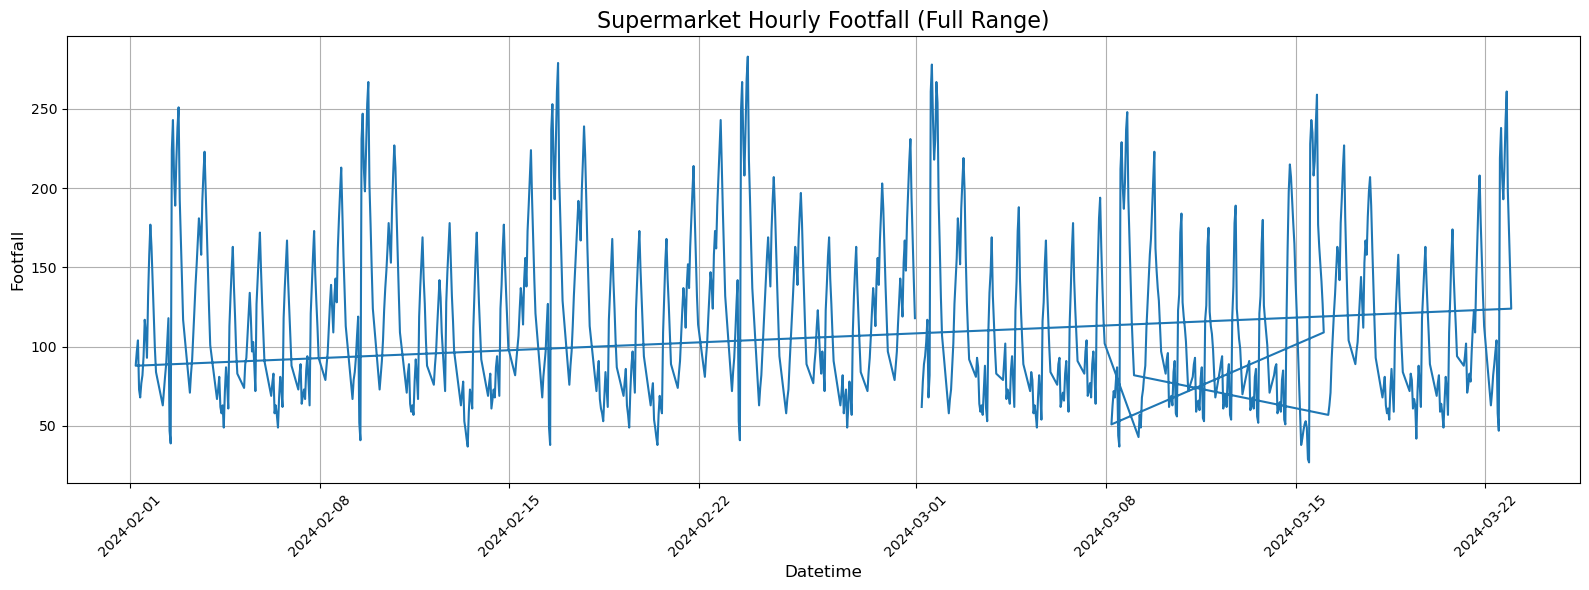

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:/Users/zaidb/Downloads/footfall_data (2).csv")

# Convert datetime with mixed formats and day-first setting
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed', dayfirst=True, errors='coerce')

# Drop rows where datetime couldn't be parsed
df = df.dropna(subset=['datetime'])

# Plot footfall over time
plt.figure(figsize=(16, 6))
plt.plot(df['datetime'], df['footfall'], color='tab:blue', linewidth=1.5)
plt.title("Supermarket Hourly Footfall (Full Range)", fontsize=16)
plt.xlabel("Datetime", fontsize=12)
plt.ylabel("Footfall", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
# Create time-based columns
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()    # Monday, Tuesday, etc.
df['month'] = df['datetime'].dt.month_name()
df['week'] = df['datetime'].dt.isocalendar().week   # ISO week number


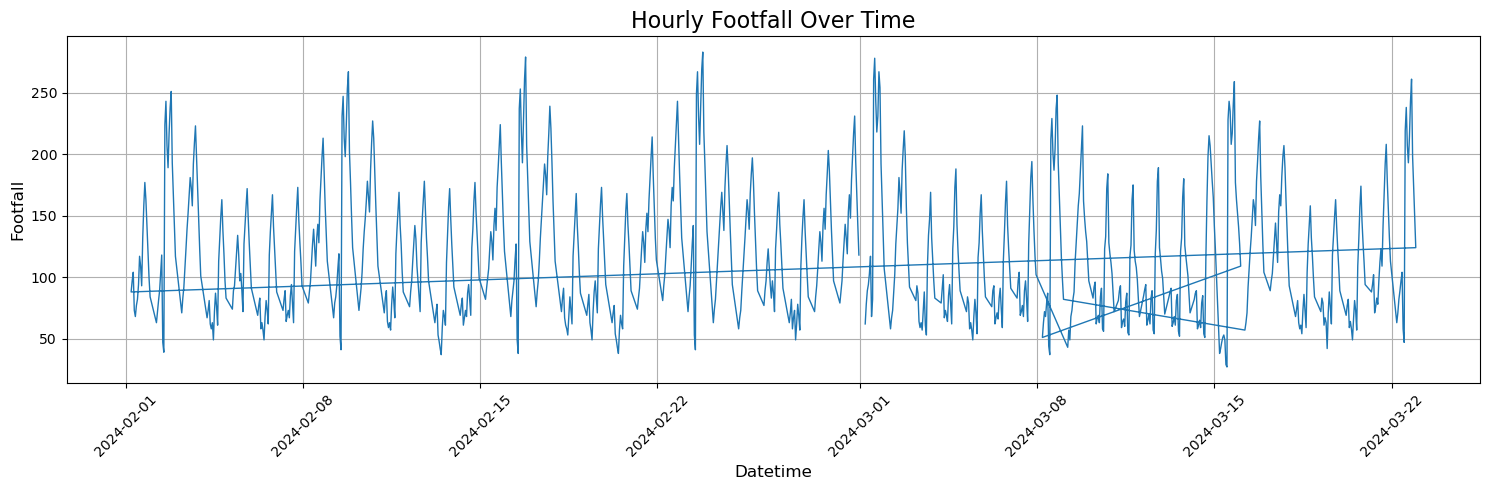

In [27]:
plt.figure(figsize=(15,5))
plt.plot(df['datetime'], df['footfall'], color='tab:blue', linewidth=1)
plt.title("Hourly Footfall Over Time", fontsize=16)
plt.xlabel("Datetime", fontsize=12)
plt.ylabel("Footfall", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


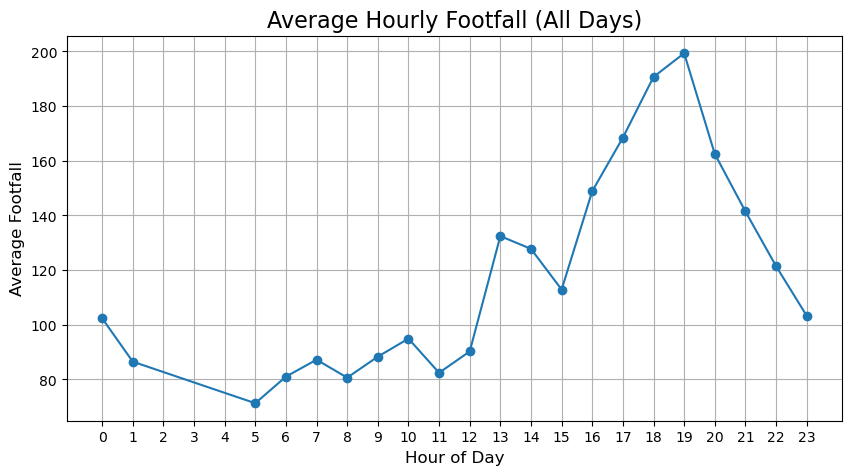

In [28]:
hourly_avg = df.groupby('hour')['footfall'].mean()

plt.figure(figsize=(10,5))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.title("Average Hourly Footfall (All Days)", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average Footfall", fontsize=12)
plt.grid(True)
plt.xticks(range(hourly_avg.index.min(), hourly_avg.index.max()+1))
plt.show()


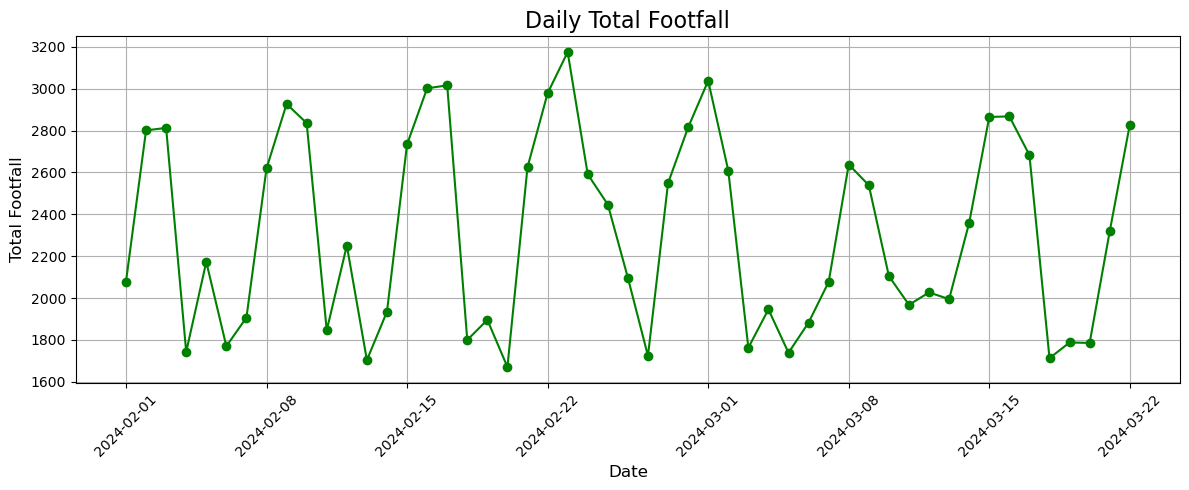

In [29]:
daily_total = df.groupby('date')['footfall'].sum()

plt.figure(figsize=(12,5))
plt.plot(daily_total.index, daily_total.values, color='green', marker='o')
plt.title("Daily Total Footfall", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Footfall", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


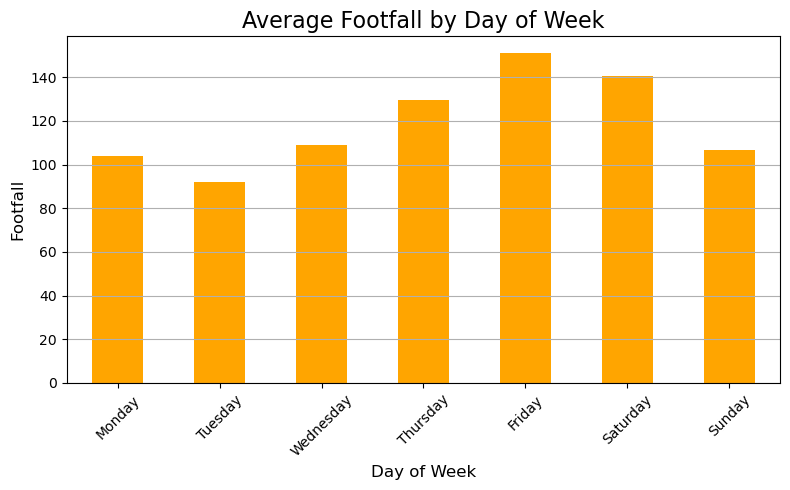

In [30]:
weekday_avg = df.groupby('day_of_week')['footfall'].mean().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

plt.figure(figsize=(8,5))
weekday_avg.plot(kind='bar', color='orange')
plt.title("Average Footfall by Day of Week", fontsize=16)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Footfall", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


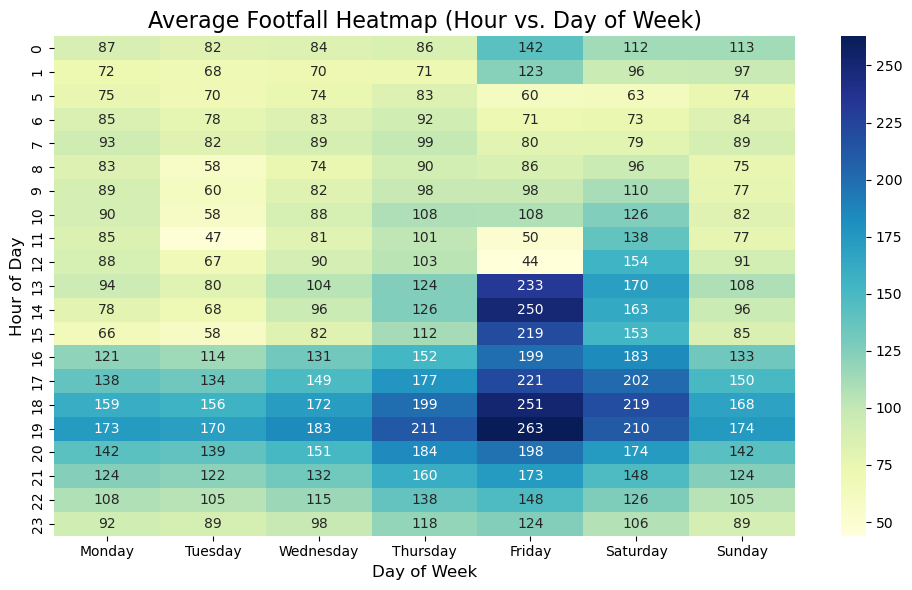

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table: rows=hour, columns=day_of_week
heatmap_data = df.pivot_table(index='hour', columns='day_of_week', values='footfall', aggfunc='mean')
# Reorder columns to standard Monday–Sunday
heatmap_data = heatmap_data[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Average Footfall Heatmap (Hour vs. Day of Week)", fontsize=16)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Hour of Day", fontsize=12)
plt.tight_layout()
plt.show()


In [34]:
# 1) SHIFT/ LAG FEATURES
df = df.sort_values('datetime')
df['footfall_lag1'] = df['footfall'].shift(1)   # 1 hour ago
df['footfall_lag2'] = df['footfall'].shift(2)   # 2 hours ago
df['footfall_lag24'] = df['footfall'].shift(24) # same hour previous day

# 2) ROLLING FEATURES
df['footfall_rolling_3'] = df['footfall'].rolling(window=3).mean()
df['footfall_rolling_6'] = df['footfall'].rolling(window=6).mean()

# 3) DROP NA ROWS (due to shifting/rolling at start)
df.dropna(inplace=True)

print(df.head())


               datetime  footfall  is_holiday day_of_week  is_weekend  \
458 2024-02-02 10:00:00       118       False      Friday        True   
459 2024-02-02 11:00:00        47       False      Friday        True   
460 2024-02-02 12:00:00        39       False      Friday        True   
461 2024-02-02 13:00:00       224       False      Friday        True   
462 2024-02-02 14:00:00       243       False      Friday        True   

           date  hour     month  week  footfall_lag1  footfall_lag2  \
458  2024-02-02    10  February     5          103.0           89.0   
459  2024-02-02    11  February     5          118.0          103.0   
460  2024-02-02    12  February     5           47.0          118.0   
461  2024-02-02    13  February     5           39.0           47.0   
462  2024-02-02    14  February     5          224.0           39.0   

     footfall_lag24  footfall_rolling_3  footfall_rolling_6  
458            88.0          103.333333           87.666667  
459       

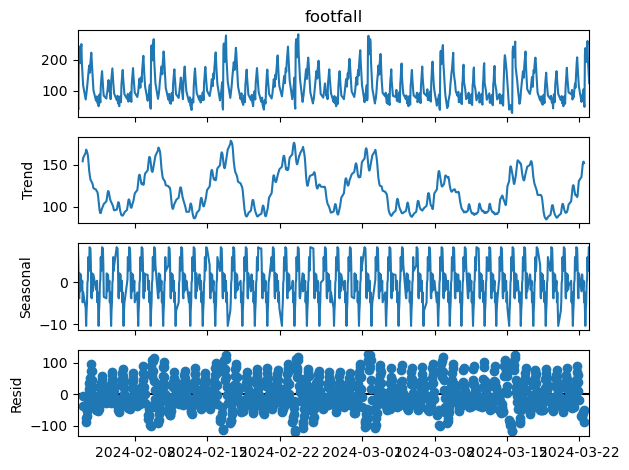

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure 'datetime' is index
df.set_index('datetime', inplace=True)

# We'll do decomposition on the original footfall or a daily resample 
# For hourly, let's assume 24-hour cycle
result = seasonal_decompose(df['footfall'], model='additive', period=24)

# Plot decomposition
result.plot()
plt.show()

# Reset index if needed
df.reset_index(inplace=True)


In [36]:
from statsmodels.tsa.stattools import adfuller

# We'll test on the original footfall series
df.set_index('datetime', inplace=True)
adf_result = adfuller(df['footfall'])
df.reset_index(inplace=True)

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
for key, value in adf_result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')


ADF Statistic: -4.245303213657407
p-value: 0.0005517343804084191
Critical Values:
   1%, -3.4373407098114765
Critical Values:
   5%, -2.8646262040163566
Critical Values:
   10%, -2.568413277899264


# Training Model 

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# 1) Load data
df = pd.read_csv("C:/Users/zaidb/Downloads/footfall_data (2).csv")

# 2) Convert datetime, drop NaN
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df.dropna(subset=['datetime'], inplace=True)

# 3) Sort by datetime
df.sort_values('datetime', inplace=True)

# 4) Feature Engineering
df['footfall_lag1'] = df['footfall'].shift(1)
df['footfall_lag2'] = df['footfall'].shift(2)
df['footfall_lag24'] = df['footfall'].shift(24)
df['footfall_rolling_3'] = df['footfall'].rolling(window=3).mean()
df['footfall_rolling_6'] = df['footfall'].rolling(window=6).mean()

df.dropna(inplace=True)

# 5) Split: last 7 days as test
split_date = df['datetime'].max() - pd.Timedelta(days=7)
train = df[df['datetime'] <= split_date].copy()
test = df[df['datetime'] > split_date].copy()

# 6) Scale data
features = ['footfall', 'footfall_lag1', 'footfall_lag2', 'footfall_lag24', 
            'footfall_rolling_3', 'footfall_rolling_6']

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[features])
test_scaled = scaler.transform(test[features])


In [55]:
def create_sequences(data, seq_length=1):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :])  # seq_length timesteps
        y.append(data[i, 0])              # 'footfall' is col 0 in scaled data
    return np.array(X), np.array(y)

seq_length = 1  # or try 24 for a full day's sequence
X_train_seq, y_train_seq = create_sequences(train_scaled, seq_length)
X_test_seq, y_test_seq = create_sequences(test_scaled, seq_length)


In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

# 1) Build
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model_lstm.summary()

# 2) Train
model_lstm.fit(
    X_train_seq, 
    y_train_seq, 
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                11400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 11451 (44.73 KB)
Trainable params: 11451 (44.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
24/24 [==============================] - 2s 12ms/step - loss: 0.1270 - val_loss: 0.0839
Epoch 2/10
24/24 [==============================] - 0s 3ms/step - loss: 0.0596 - val_loss: 0.0423
Epoch 3/10
24/24 [==============================] - 0s 4ms/step - loss: 0.0296 - val_loss: 0.0333
Epoch 4/10
24/24 [==============================] - 0s 4ms/step - loss: 0.0260 - val_loss: 0.0318
Epoch 5/10
24/24 [===

5/5 [==============================] - 0s 5ms/step
LSTM MAE: 22.555973622336317
LSTM RMSE: 28.610820816996668


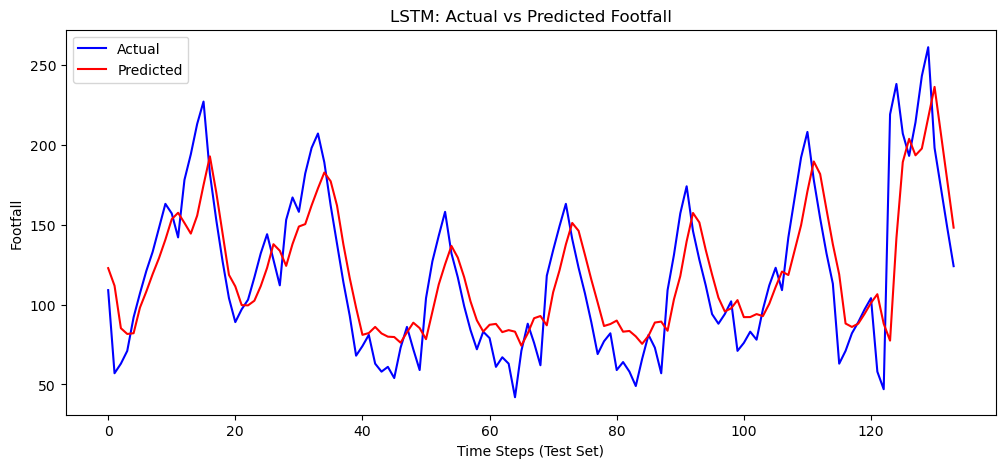

In [57]:
# Predict
predictions = model_lstm.predict(X_test_seq)

# Invert scaling
test_preds = np.zeros((len(predictions), len(features)))
test_preds[:, 0] = predictions[:, 0]
test_preds = scaler.inverse_transform(test_preds)
predicted_footfall = test_preds[:, 0]

# Also invert y_test
actual_arr = np.zeros((len(y_test_seq), len(features)))
actual_arr[:, 0] = y_test_seq
actual_arr = scaler.inverse_transform(actual_arr)
actual_footfall = actual_arr[:, 0]

# Evaluate
mae = mean_absolute_error(actual_footfall, predicted_footfall)
rmse = math.sqrt(mean_squared_error(actual_footfall, predicted_footfall))
print("LSTM MAE:", mae)
print("LSTM RMSE:", rmse)

# Plot
plt.figure(figsize=(12,5))
plt.plot(range(len(actual_footfall)), actual_footfall, label='Actual', color='blue')
plt.plot(range(len(predicted_footfall)), predicted_footfall, label='Predicted', color='red')
plt.title("LSTM: Actual vs Predicted Footfall")
plt.xlabel("Time Steps (Test Set)")
plt.ylabel("Footfall")
plt.legend()
plt.show()


# XGBoost

In [58]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# 1) Align Data for XGBoost
#    Because LSTM/GRU skip 'seq_length' rows, do the same for XGBoost to match indices:
X_train_xgb = train_scaled[:-seq_length]   # shape: (len(train_scaled)-seq_length, n_features)
y_train_xgb = train_scaled[seq_length:, 0] # 'footfall' is col 0
X_test_xgb  = test_scaled[:-seq_length]
y_test_xgb  = test_scaled[seq_length:, 0]

# 2) Build & Train XGBoost
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train_xgb, y_train_xgb)

# 3) Predict
y_pred_xgb_scaled = model_xgb.predict(X_test_xgb)

# 4) Invert Scaling for Predictions
pred_xgb_arr = np.zeros((len(y_pred_xgb_scaled), len(features)))
pred_xgb_arr[:, 0] = y_pred_xgb_scaled  # col 0 = footfall
pred_xgb_arr = scaler.inverse_transform(pred_xgb_arr)
pred_xgb = pred_xgb_arr[:, 0]           # final XGBoost predictions

# 5) Invert Scaling for Actual
actual_xgb_arr = np.zeros((len(y_test_xgb), len(features)))
actual_xgb_arr[:, 0] = y_test_xgb
actual_xgb_arr = scaler.inverse_transform(actual_xgb_arr)
actual_xgb = actual_xgb_arr[:, 0]

# 6) Evaluate
mae_xgb = mean_absolute_error(actual_xgb, pred_xgb)
rmse_xgb = math.sqrt(mean_squared_error(actual_xgb, pred_xgb))
print("XGB MAE:", mae_xgb)
print("XGB RMSE:", rmse_xgb)


XGB MAE: 12.078622504846374
XGB RMSE: 20.51359013651571


# GRU

In [59]:
import numpy as np
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.optimizers import Adam

# 1) Build & Compile GRU
model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model_gru.add(Dense(1))

model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model_gru.summary()

# 2) Train
model_gru.fit(
    X_train_seq,  # from your sequence creation
    y_train_seq,  
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# 3) Predict
predictions_gru_scaled = model_gru.predict(X_test_seq)

# 4) Invert Scaling for Predictions
test_preds = np.zeros((len(predictions_gru_scaled), len(features)))
test_preds[:, 0] = predictions_gru_scaled[:, 0]
test_preds = scaler.inverse_transform(test_preds)
pred_gru = test_preds[:, 0]

# 5) Invert Scaling for Actual
actual_arr = np.zeros((len(y_test_seq), len(features)))
actual_arr[:, 0] = y_test_seq
actual_arr = scaler.inverse_transform(actual_arr)
actual_gru = actual_arr[:, 0]

# 6) Evaluate
mae_gru = mean_absolute_error(actual_gru, pred_gru)
rmse_gru = math.sqrt(mean_squared_error(actual_gru, pred_gru))
print("GRU MAE:", mae_gru)
print("GRU RMSE:", rmse_gru)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 50)                8700      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8751 (34.18 KB)
Trainable params: 8751 (34.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
24/24 [==============================] - 2s 12ms/step - loss: 0.1072 - val_loss: 0.0501
Epoch 2/10
24/24 [==============================] - 0s 3ms/step - loss: 0.0314 - val_loss: 0.0375
Epoch 3/10
24/24 [==============================] - 0s 3ms/step - loss: 0.0264 - val_loss: 0.0331
Epoch 4/10
24/24 [==============================] - 0s 3ms/step - loss: 0.0233 - val_loss: 0.0303
Epoch 5/10
24/24 [=====

In [64]:
# After training model_lstm and creating X_test_seq, do:

predictions_lstm = model_lstm.predict(X_test_seq)

# Invert scaling
test_preds_lstm = np.zeros((len(predictions_lstm), len(features)))
test_preds_lstm[:, 0] = predictions_lstm[:, 0]
test_preds_lstm = scaler.inverse_transform(test_preds_lstm)

# Final LSTM predictions
predicted_footfall_lstm = test_preds_lstm[:, 0]

# Also invert y_test_seq for actual footfall
actual_lstm_arr = np.zeros((len(y_test_seq), len(features)))
actual_lstm_arr[:, 0] = y_test_seq
actual_lstm_arr = scaler.inverse_transform(actual_lstm_arr)
actual_footfall = actual_lstm_arr[:, 0]  # We'll call this our 'actual_footfall'


5/5 [==============================] - 0s 3ms/step


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                8700      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8751 (34.18 KB)
Trainable params: 8751 (34.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
24/24 [==============================] - 2s 13ms/step - loss: 0.1733 - val_loss: 0.0752
Epoch 2/10
24/24 [==============================] - 0s 4ms/step - loss: 0.0465 - val_loss: 0.0361
Epoch 3/10
24/24 [==============================] - 0s 3ms/step - loss: 0.0280 - val_loss: 0.0336
Epoch 4/10
24/24 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.0312
Epoch 5/10
24/24 [=====

In [44]:
# Predict
predictions = model.predict(X_test)

# Invert scaling for predictions
test_preds = np.zeros((len(predictions), len(features)))
test_preds[:, 0] = predictions[:, 0]  # footfall is col 0
test_preds = scaler.inverse_transform(test_preds)
predicted_footfall = test_preds[:, 0]

# Invert scaling for actual
actual = np.zeros((len(y_test), len(features)))
actual[:, 0] = y_test
actual = scaler.inverse_transform(actual)
actual_footfall = actual[:, 0]
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

mae = mean_absolute_error(actual_footfall, predicted_footfall)
rmse = math.sqrt(mean_squared_error(actual_footfall, predicted_footfall))

print("GRU MAE:", mae)
print("GRU RMSE:", rmse)


5/5 [==============================] - 0s 2ms/step


GRU MAE: 22.94499343188841
GRU RMSE: 29.11629161013342


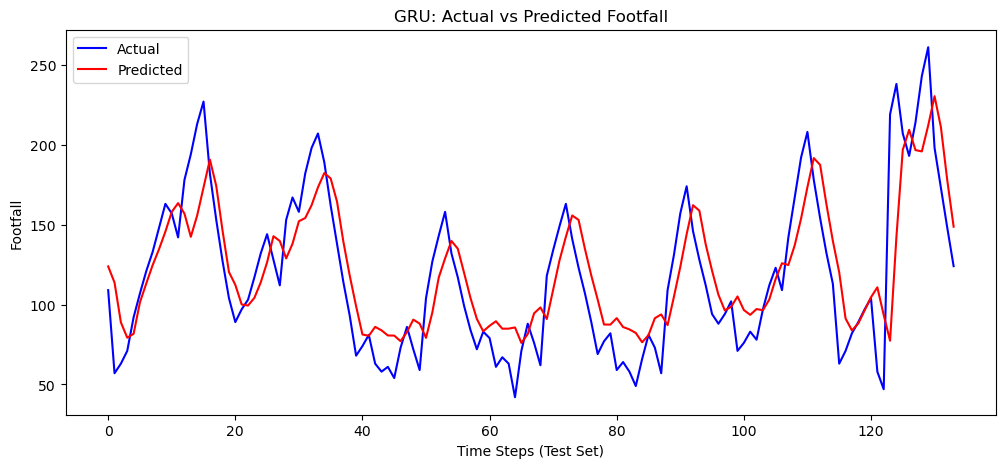

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(range(len(actual_footfall)), actual_footfall, label='Actual', color='blue')
plt.plot(range(len(predicted_footfall)), predicted_footfall, label='Predicted', color='red')
plt.title("GRU: Actual vs Predicted Footfall")
plt.xlabel("Time Steps (Test Set)")
plt.ylabel("Footfall")
plt.legend()
plt.show()


In [65]:
# After training model_lstm and creating X_test_seq, do:

predictions_lstm = model_lstm.predict(X_test_seq)

# Invert scaling
test_preds_lstm = np.zeros((len(predictions_lstm), len(features)))
test_preds_lstm[:, 0] = predictions_lstm[:, 0]
test_preds_lstm = scaler.inverse_transform(test_preds_lstm)

# Final LSTM predictions
predicted_footfall_lstm = test_preds_lstm[:, 0]

# Also invert y_test_seq for actual footfall
actual_lstm_arr = np.zeros((len(y_test_seq), len(features)))
actual_lstm_arr[:, 0] = y_test_seq
actual_lstm_arr = scaler.inverse_transform(actual_lstm_arr)
actual_footfall = actual_lstm_arr[:, 0]  # We'll call this our 'actual_footfall'


5/5 [==============================] - 0s 3ms/step


In [66]:
# After training model_gru and creating X_test_seq, do:

predictions_gru = model_gru.predict(X_test_seq)

# Invert scaling
test_preds_gru = np.zeros((len(predictions_gru), len(features)))
test_preds_gru[:, 0] = predictions_gru[:, 0]
test_preds_gru = scaler.inverse_transform(test_preds_gru)

# Final GRU predictions
predicted_footfall_gru = test_preds_gru[:, 0]

# The actual footfall is the same array we used for LSTM if the test data is identical
# i.e., actual_footfall


5/5 [==============================] - 0s 4ms/step


In [67]:
# After training XGBoost and creating X_test_xgb, do:

y_pred_xgb_scaled = model_xgb.predict(X_test_xgb)

# Invert scaling
test_preds_xgb = np.zeros((len(y_pred_xgb_scaled), len(features)))
test_preds_xgb[:, 0] = y_pred_xgb_scaled
test_preds_xgb = scaler.inverse_transform(test_preds_xgb)

# Final XGB predictions
predicted_footfall_xgb = test_preds_xgb[:, 0]

# If your XGBoost test set lines up with the same timestamps, 
# actual_footfall is the same as before. 
# Otherwise, invert y_test_xgb similarly and name it 'actual_footfall_xgb'.


Ensemble MAE (simple avg): 17.50045931991653
Ensemble RMSE (simple avg): 23.845278587011023


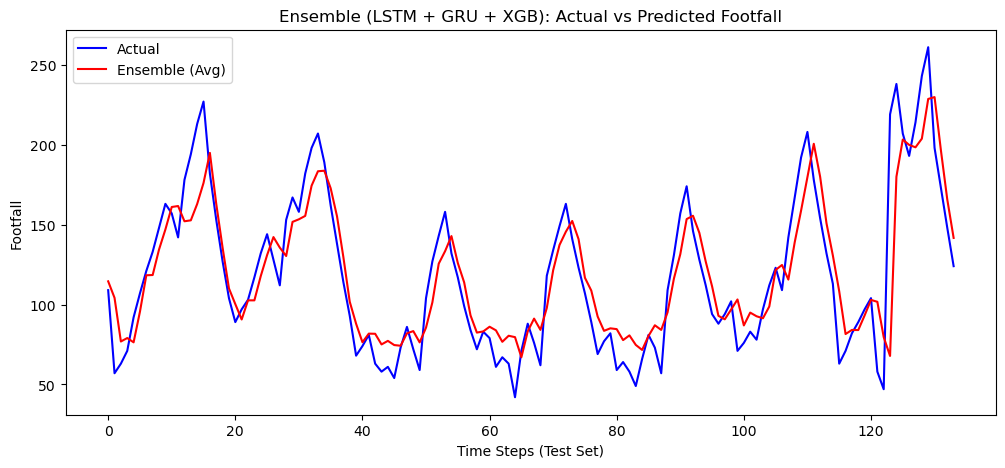

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# 1) Simple average ensemble
ensemble_pred = (
    predicted_footfall_lstm + 
    predicted_footfall_gru + 
    predicted_footfall_xgb
) / 3.0

# 2) Evaluate
mae_ens = mean_absolute_error(actual_footfall, ensemble_pred)
rmse_ens = math.sqrt(mean_squared_error(actual_footfall, ensemble_pred))
print("Ensemble MAE (simple avg):", mae_ens)
print("Ensemble RMSE (simple avg):", rmse_ens)

# 3) Plot
plt.figure(figsize=(12,5))
plt.plot(range(len(actual_footfall)), actual_footfall, label='Actual', color='blue')
plt.plot(range(len(ensemble_pred)), ensemble_pred, label='Ensemble (Avg)', color='red')
plt.title("Ensemble (LSTM + GRU + XGB): Actual vs Predicted Footfall")
plt.xlabel("Time Steps (Test Set)")
plt.ylabel("Footfall")
plt.legend()
plt.show()


In [ ]:
import warnings
# Suppress the "X does not have valid feature names" UserWarning from sklearn
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

import pandas as pd
import numpy as np
from datetime import timedelta
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def universal_ensemble_forecast(
    df,
    date_time_str,
    model_lstm,
    model_gru,
    model_xgb,
    scaler,
    features,
    seq_length=1,
    freq='1H'  # e.g. "1H" for hourly increments
):
    """
    Predict/Forecast footfall at 'date_time_str' using an ensemble of (LSTM, GRU, XGBoost).
    
    - If 'date_time_str' is already in df, returns a single-step prediction for that row.
    - If 'date_time_str' is after df's max datetime, does a multi-step forecast from
      df['datetime'].max() forward, hour by hour, until reaching 'date_time_str'.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Historical data + lag/rolling features. Must include the last known row
        you want to build upon. If you want to forecast from e.g. "2025-03-15 11:00:00",
        that row must exist with valid lags in df.
    date_time_str : str
        The target date/time for prediction, e.g. "2025-03-15 12:00:00"
    model_lstm, model_gru, model_xgb :
        Trained models (Keras for LSTM/GRU, XGBRegressor for XGBoost)
    scaler : fitted MinMaxScaler (or StandardScaler)
    features : list of str
        Columns used for training each model (including 'footfall' as col 0)
    seq_length : int
        How many timesteps your LSTM/GRU needs. Must match training (e.g., 1 or 24).
    freq : str
        A valid pandas Timedelta string (e.g. '1H', '30min', '1D'). Default '1H' = hourly steps.

    Returns:
    --------
    (ensemble_val, df_updated)
    ensemble_val : float
        The ensemble forecast for 'date_time_str'
    df_updated : pd.DataFrame
        The updated df with newly forecasted rows appended if we had to multi-step
    """

    # Make a copy and ensure datetime is sorted
    df = df.copy()
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df.dropna(subset=['datetime'], inplace=True)
    df.sort_values('datetime', inplace=True)
    df.reset_index(drop=True, inplace=True)

    target_dt = pd.to_datetime(date_time_str)
    if pd.isna(target_dt):
        raise ValueError(f"Invalid date_time_str: {date_time_str}")

    last_dt = df['datetime'].max()

    # ------------------------- CASE A: Single-Step (target_dt <= last_dt) -------------------------
    if target_dt <= last_dt:
        # Check if the row for target_dt exists
        match_idx = df.index[df['datetime'] == target_dt]
        if len(match_idx) == 0:
            raise ValueError(
                f"Requested datetime {target_dt} is within your data range, "
                "but no exact row found. Insert or do a multi-step from an earlier time."
            )

        row_pos = match_idx[0]
        start_seq = row_pos - (seq_length - 1)
        if start_seq < 0:
            raise ValueError(
                f"Not enough history to form sequence of length {seq_length} at {target_dt}."
            )

        # Slice the needed rows for LSTM/GRU
        seq_df = df.loc[start_seq : row_pos, features].values
        seq_scaled = scaler.transform(seq_df)  # shape=(seq_length, n_features)
        seq_scaled = np.expand_dims(seq_scaled, axis=0)  # shape=(1, seq_length, n_features)

        # LSTM predict
        pred_lstm_scaled = model_lstm.predict(seq_scaled)[0, 0]
        # GRU predict
        pred_gru_scaled = model_gru.predict(seq_scaled)[0, 0]
        # XGBoost predict (take last row of seq for XGB input)
        xgb_input = seq_scaled[0, -1, :]  # shape=(n_features,)
        pred_xgb_scaled = model_xgb.predict(np.array([xgb_input]))[0]

        # Invert scaling
        tmp_lstm = np.zeros((1, len(features)))
        tmp_lstm[0, 0] = pred_lstm_scaled
        pred_lstm_inv = scaler.inverse_transform(tmp_lstm)[0, 0]

        tmp_gru = np.zeros((1, len(features)))
        tmp_gru[0, 0] = pred_gru_scaled
        pred_gru_inv = scaler.inverse_transform(tmp_gru)[0, 0]

        tmp_xgb = np.zeros((1, len(features)))
        tmp_xgb[0, 0] = pred_xgb_scaled
        pred_xgb_inv = scaler.inverse_transform(tmp_xgb)[0, 0]

        # Ensemble
        ensemble_val = (pred_lstm_inv + pred_gru_inv + pred_xgb_inv) / 3.0
        return ensemble_val, df

    # ------------------------- CASE B: Multi-Step (target_dt > last_dt) -------------------------
    else:
        current_dt = last_dt

        while current_dt < target_dt:
            next_dt = current_dt + pd.Timedelta(freq)
            if next_dt > target_dt:
                next_dt = target_dt

            # Find row for current_dt
            row_idx = df.index[df['datetime'] == current_dt]
            if len(row_idx) == 0:
                raise ValueError(f"Lost track of current_dt = {current_dt} in df.")

            row_pos = row_idx[0]
            start_seq = row_pos - (seq_length - 1)
            if start_seq < 0:
                raise ValueError(
                    f"Not enough history for seq_length={seq_length} at {current_dt}."
                )

            seq_df = df.loc[start_seq : row_pos, features].values
            seq_scaled = scaler.transform(seq_df)
            seq_scaled = np.expand_dims(seq_scaled, axis=0)

            # LSTM
            pred_lstm_scaled = model_lstm.predict(seq_scaled)[0, 0]
            # GRU
            pred_gru_scaled = model_gru.predict(seq_scaled)[0, 0]
            # XGBoost
            xgb_input = seq_scaled[0, -1, :]
            pred_xgb_scaled = model_xgb.predict(np.array([xgb_input]))[0]

            # Invert scaling
            tmp_lstm = np.zeros((1, len(features)))
            tmp_lstm[0, 0] = pred_lstm_scaled
            pred_lstm_inv = scaler.inverse_transform(tmp_lstm)[0, 0]

            tmp_gru = np.zeros((1, len(features)))
            tmp_gru[0, 0] = pred_gru_scaled
            pred_gru_inv = scaler.inverse_transform(tmp_gru)[0, 0]

            tmp_xgb = np.zeros((1, len(features)))
            tmp_xgb[0, 0] = pred_xgb_scaled
            pred_xgb_inv = scaler.inverse_transform(tmp_xgb)[0, 0]

            # Ensemble
            ensemble_pred = (pred_lstm_inv + pred_gru_inv + pred_xgb_inv) / 3.0

            # Build new row for next_dt
            new_row = {
                'datetime': next_dt,
                'footfall': ensemble_pred
            }
            # footfall_lag1
            new_row['footfall_lag1'] = df.loc[row_pos, 'footfall']
            # footfall_lag2
            if row_pos - 1 >= 0:
                new_row['footfall_lag2'] = df.loc[row_pos - 1, 'footfall']
            else:
                new_row['footfall_lag2'] = np.nan
            # footfall_lag24
            if row_pos - 24 >= 0:
                new_row['footfall_lag24'] = df.loc[row_pos - 24, 'footfall']
            else:
                new_row['footfall_lag24'] = np.nan

            # rolling_3
            last_2_indices = [row_pos - 1, row_pos - 2]
            valid_vals_3 = [df.loc[i, 'footfall'] for i in last_2_indices if i >= 0]
            valid_vals_3.append(df.loc[row_pos, 'footfall'])
            new_row['footfall_rolling_3'] = np.mean(valid_vals_3) if len(valid_vals_3) == 3 else np.nan

            # rolling_6
            last_5_indices = [row_pos - i for i in range(1,6)]
            valid_vals_6 = [df.loc[i, 'footfall'] for i in last_5_indices if i >= 0]
            valid_vals_6.append(df.loc[row_pos, 'footfall'])
            new_row['footfall_rolling_6'] = np.mean(valid_vals_6) if len(valid_vals_6) == 6 else np.nan

            # Append row with pd.concat (pandas 2.0+)
            new_row_df = pd.DataFrame([new_row])
            df = pd.concat([df, new_row_df], ignore_index=True)

            current_dt = next_dt
            if current_dt == target_dt:
                break

        # We appended the row for target_dt
        final_row_idx = df.index[df['datetime'] == target_dt]
        final_ensemble_val = df.loc[final_row_idx, 'footfall'].values[0]
        return final_ensemble_val, df


# ------------------------ EXAMPLE USAGE ------------------------ #
if __name__ == "__main__":
    # Suppose you have:
    #  - df: your dataset with historical footfall + lag/rolling columns
    #  - model_lstm, model_gru, model_xgb: trained models
    #  - scaler: fitted MinMaxScaler
    #  - features: list of columns used for training

    # For demonstration, let's do a quick dummy approach:
    # df = pd.read_csv("your_dataset.csv")
    # features = [...]
    # model_lstm = ... (load or define)
    # model_gru = ...
    # model_xgb = ...
    # scaler = ...

    # Then call:
    # predicted_val, updated_df = universal_ensemble_forecast(
    #     df=df,
    #     date_time_str="2025-03-15 12:00:00",
    #     model_lstm=model_lstm,
    #     model_gru=model_gru,
    #     model_xgb=model_xgb,
    #     scaler=scaler,
    #     features=features,
    #     seq_length=1,
    #     freq='1H'
    # )
    # print("Predicted footfall:", predicted_val)

    print("This is just a template. Plug in your own data/models.")


In [ ]:
predicted_value, updated_df = universal_ensemble_forecast(
    df=df,
    date_time_str="2025-03-15 12:00:00",
    model_lstm=model_lstm,
    model_gru=model_gru,
    model_xgb=model_xgb,
    scaler=scaler,
    features=[
       'footfall','footfall_lag1','footfall_lag2','footfall_lag24',
       'footfall_rolling_3','footfall_rolling_6'
    ],
    seq_length=1,
    freq='1H'  # <-- Must be a valid Timedelta string
)

print("Ensemble forecast for 2025-03-15 12:00:00 =", predicted_value)
